In [4]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

## Load Training Data

In [59]:
train_dataset = pd.read_csv("/Users/danielguarnizo/Desktop/HACK4SDS/Dataset_DAY1/Data/train_set.csv", delimiter=';')

In [60]:
train_dataset.head() 

,application_ID,decision_date,company_ID,external_score_ver01,external_score_ver02,late_payment_score,external_score_late_payment_integrated,external_score_moderate,external_score_adverse,external_score_ver03,age,province,juridical_form,industry_sector,gross_margin_ratio,core_income_ratio,cash_asset_ratio,consolidated_liabilities_ratio,tangible_assets_ratio,revenues,cr_available,region,geo_area,last_statement_age,overrun_freq_a_revoca_autoliquidanti,avg_tension_a_revoca_autoliquidanti,std_tension_a_revoca_autoliquidanti,max_tension_a_revoca_autoliquidanti,last_tension_a_revoca_autoliquidanti,avg_rel_used_a_revoca_autoliquidanti,std_rel_used_a_revoca_autoliquidanti,max_rel_used_a_revoca_autoliquidanti,last_rel_used_a_revoca_autoliquidanti,overrun_freq_a_scadenza,avg_rel_used_a_scadenza,std_rel_used_a_scadenza,max_rel_used_a_scadenza,last_rel_used_a_scadenza,avg_count_enti_affidanti,std_count_enti_affidanti,max_count_enti_affidanti,last_count_enti_affidanti,avg_count_numero_prima_info,std_count_numero_prima_info,max_count_numero_prima_info,last_count_numero_prima_info,days_to_default,target
0,a1Q7R00000ej2yjUAA,2021-11-30,7256587870,10,3,NaN,NaN,NaN,NaN,MISSING,15,TP,SR,Servizi,"0,464636707194417","0,0125934084914631",0,"0,416001808268284",1,410,True,Sicilia,Isole,2,0,0,0,0,0,0,0,0,0,"0,25","0,176974593495935","0,00211193175908977","0,179073170731707","0,172031707317073",1,0,1,1,0,0,0,0,522,1
1,a1Q2X00000ZWC5LUAX,2020-10-06,6178307100,7,3,NaN,NaN,NaN,NaN,H,5,CA,RS,Costruzioni e materiali per costruzioni,"0,372340425531915","0,115384615384615","0,235955056179775","0,484042553191489",1,208,True,Sardegna,Isole,3,0,0,0,0,0,0,0,0,0,0,"0,151754006410256","0,00680628616351487","0,164754807692308","0,146384615384615",1,0,1,1,2,0,2,2,1498,0
2,a1Q2X00000XcCCQUA3,2020-02-11,7692855390,7,3,NaN,NaN,NaN,NaN,MISSING,5,LE,SR,Distribuzione,"0,27","0,00636942675159236","0,359375","0,125","0,375",471,False,Puglia,Sud,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,1,1,779,1
3,a1Q7R00000ejSs3UAE,2022-01-18,5752241730,8,2,NaN,NaN,NaN,NaN,MISSING,6,RM,SR,Servizi,"0,419928825622776","0,152173913043478","0,136150234741784","0,765124555160142","0,0588235294117647",598,True,Lazio,Centro,3,0,0,0,0,0,0,0,0,0,0,"0,0250836120401338","0,0261989783210917","0,0501672240802676","0,0501672240802676",1,0,1,1,"0,5","0,522232967867094",1,0,1498,0
4,a1Q7R00000eiRidUAE,2021-09-16,7533506540,4,1,NaN,NaN,NaN,NaN,MISSING,5,PD,SR,Servizi,"0,526315789473684","0,0833333333333333","0,233333333333333","0,197368421052632","0,75",108,False,Veneto,Nord-est,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1498,0


## Analizing Data

In [7]:
import seaborn as sns

In [8]:
train_dataset.describe()

,external_score_ver01,external_score_ver02,late_payment_score,external_score_late_payment_integrated,external_score_moderate,external_score_adverse,age,last_statement_age,max_count_enti_affidanti,last_count_enti_affidanti,max_count_numero_prima_info,last_count_numero_prima_info,days_to_default,target
count,32032.000000,32032.000000,4544.000000,4544.000000,4824.000000,4824.000000,32032.000000,32032.000000,32032.000000,32032.000000,32032.000000,32032.000000,32032.000000,32032.000000
mean,6.772040,1.942433,9.286532,5.891505,6.039594,6.168947,8.972715,1.824894,2.928571,2.691964,1.146354,0.976773,1281.800356,0.215222
std,1.764166,0.786342,2.760645,1.244978,1.302913,1.343487,9.003956,0.621009,3.321439,3.105271,1.494643,1.314287,426.997217,0.410983
min,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,6.000000,1.000000,7.000000,5.000000,5.000000,5.000000,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1498.000000,0.000000
50%,6.000000,2.000000,9.000000,6.000000,6.000000,6.000000,6.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1498.000000,0.000000
75%,8.000000,3.000000,10.000000,7.000000,7.000000,7.000000,11.000000,2.000000,4.000000,4.000000,2.000000,1.000000,1498.000000,0.000000
max,10.000000,3.000000,20.000000,10.000000,10.000000,10.000000,106.000000,7.000000,50.000000,45.000000,12.000000,12.000000,1498.000000,1.000000


In [9]:
#train_dataset.values.sum()

<Axes: xlabel='target', ylabel='count'>

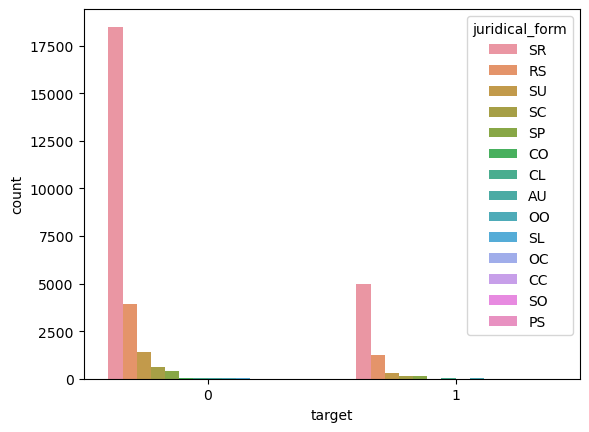

In [10]:
sns.countplot(x='target', hue= 'juridical_form', data= train_dataset)

## Clean and encode Data

#### Drop unneeded columns

In [61]:
## drop features
def Drop_unneed_columns(test, dataset):
    cols= ['days_to_default', 'application_ID', 'decision_date', 'company_ID']
    if test:
        cols.remove('days_to_default')
    else:
        dataset= dataset.drop(columns=cols)
    return dataset


#### Find columns with to many Nan's values

In [62]:
def Nan_values(dataset):
    column_names = dataset.columns.tolist()
    drop_columns = []
    for name in column_names:
        nan_count = dataset[name].isna().sum()
        print(f"column {name}: {nan_count}")
        if (nan_count/28000) > 0.5:
            print(f"Number of NaN values in column '{name}': {nan_count}")
            drop_columns.append(name)
    return drop_columns

#### Label enconding

In [63]:
def Replace_cate_to_value(column_name, dataset):
    # Extract categories

    # Extract unique category names from the column
    unique_categories = dataset[column_name].unique()

    # convert 'numpy.ndarray' in to a python list
    l = unique_categories.tolist()

    # print("Unique categories in the column:")
    # print(l)
    if 'MISSING' in l:
        l.remove('MISSING')
        l.sort(reverse=True)
    # print(unique_categories)

    # print(f"remove{l}")
    dic = { l[i]:i+1 for i in range(0, len(l))}

    # dic = {}

    # for name in unique_categories:
    #     if name != "MISSING":
    #         dic{}
    # print(dic)

    # Replace values in the column based on the dictionary mapping
    dataset[column_name] = dataset[column_name].replace(dic)
    # print(train_dataset[column_name])

    # print("Updated DataFrame:")
    # print(train_dataset[column_name])
    return dataset

In [64]:
def Category_values(dataset):
    column_names = ['industry_sector', 'region', 'geo_area','external_score_ver03', 'province','juridical_form']
    for column_name in column_names:
        Replace_cate_to_value(column_name, dataset)
    return dataset

#### Replace True and False values to numerical values in Columns

In [65]:
def Replace_bool_toNumbers(dataset):
    dataset['cr_available'] = [int(dataset['cr_available'][i]) for i in range(len(dataset['cr_available']))]
    dataset['cr_available']
    return dataset

#### Mean of external score var 03 

In [69]:
def mean_var03(dataset):
    s0, s1, c0, c1 = 0,0,0,0
    unique_labels = dataset['target'].unique()
    for index, row in dataset.iterrows():
        if row['external_score_ver03'] != 'MISSING':
            if row['target'] == 0:
                s0 += int(row['external_score_ver03'])
                c0 +=1
            elif row['target'] == 1:
                s1 += int(row['external_score_ver03'])
                c1 += 1

    m0 = round(s0/c0)
    m1 = round(s1/c1)
    print(m0)
    print(m1)
    return m0,m1


#### Replace MISSING values to Mean finded 

In [67]:
def Replace_missing(dataset, m0, m1):
    # Assuming df is your DataFrame and 'column_to_change' is the column you want to change
    # 'condition_column' is the column based on which you want to change the content
    dataset.loc[(train_dataset['target'] == 1) & (dataset['external_score_ver03'] == 'MISSING'), 'external_score_ver03'] = m1
    dataset.loc[(train_dataset['target'] == 0) & (dataset['external_score_ver03'] == 'MISSING'), 'external_score_ver03'] = m0
    dataset['external_score_ver03']

    # For example, if you want to change the content of 'column_to_change' to 'new_value' where 'condition_column' is True
    # Replace 'new_value', 'column_to_change', and 'condition_column' with your actual values
    return dataset

## Main code for train dataset 

In [70]:
# Drop columns 
train_dataset = Drop_unneed_columns(False,train_dataset)
drop_columns = Nan_values(train_dataset)
train_dataset = train_dataset.drop(columns=drop_columns)



KeyError: "['days_to_default', 'application_ID', 'decision_date', 'company_ID'] not found in axis"

In [71]:
# replace bool values to numerical ones 
train_dataset = Replace_bool_toNumbers(train_dataset)

In [72]:
# v03 column with missing values 
m0, m1= mean_var03(train_dataset)
train_dataset = Replace_missing(train_dataset, m0, m1)

ValueError: invalid literal for int() with base 10: 'H'

## Normalise Datase

#### Replace the "," to ".", in such a way to pass from object to number

In [20]:
# Replace commas with periods in all columns
train_dataset = train_dataset.replace(',', '.', regex=True)


/var/folders/sq/lqj95by96lnccb74l6fsytf00000gn/T/ipykernel_7013/3884997620.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_dataset = train_dataset.replace(',', '.', regex=True)


In [21]:
pd.set_option('display.max_columns', None)
train_dataset.head(30)

,external_score_ver01,external_score_ver02,external_score_ver03,age,province,juridical_form,industry_sector,gross_margin_ratio,core_income_ratio,cash_asset_ratio,consolidated_liabilities_ratio,tangible_assets_ratio,revenues,cr_available,region,geo_area,last_statement_age,overrun_freq_a_revoca_autoliquidanti,avg_tension_a_revoca_autoliquidanti,std_tension_a_revoca_autoliquidanti,max_tension_a_revoca_autoliquidanti,last_tension_a_revoca_autoliquidanti,avg_rel_used_a_revoca_autoliquidanti,std_rel_used_a_revoca_autoliquidanti,max_rel_used_a_revoca_autoliquidanti,last_rel_used_a_revoca_autoliquidanti,overrun_freq_a_scadenza,avg_rel_used_a_scadenza,std_rel_used_a_scadenza,max_rel_used_a_scadenza,last_rel_used_a_scadenza,avg_count_enti_affidanti,std_count_enti_affidanti,max_count_enti_affidanti,last_count_enti_affidanti,avg_count_numero_prima_info,std_count_numero_prima_info,max_count_numero_prima_info,last_count_numero_prima_info,target
0,10,3,10,15,1,1,1,0.464636707194417,0.0125934084914631,0,0.416001808268284,1,410,1,1,1,2,0,0,0,0,0,0,0,0,0,0.25,0.176974593495935,0.00211193175908977,0.179073170731707,0.172031707317073,1,0,1,1,0,0,0,0,1
1,7,3,7,5,2,2,2,0.372340425531915,0.115384615384615,0.235955056179775,0.484042553191489,1,208,1,2,1,3,0,0,0,0,0,0,0,0,0,0,0.151754006410256,0.00680628616351487,0.164754807692308,0.146384615384615,1,0,1,1,2,0,2,2,0
2,7,3,10,5,3,1,3,0.27,0.00636942675159236,0.359375,0.125,0.375,471,0,3,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,1,1,1
3,8,2,8,6,4,1,1,0.419928825622776,0.152173913043478,0.136150234741784,0.765124555160142,0.0588235294117647,598,1,4,3,3,0,0,0,0,0,0,0,0,0,0,0.0250836120401338,0.0261989783210917,0.0501672240802676,0.0501672240802676,1,0,1,1,0.5,0.522232967867094,1,0,0
4,4,1,8,5,5,1,1,0.526315789473684,0.0833333333333333,0.233333333333333,0.197368421052632,0.75,108,0,5,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,6,1,12,2,6,1,4,0.673177083333333,0.0266086115142719,0.192248062015504,0.252604166666667,0.504065040650406,2073,1,6,5,1,0,0,0,0,0,0,0,0,0,0.25,0.0606801736613604,0.0372223615134005,0.146051133622769,0.146051133622769,2.25,0.452267016866645,3,3,2.91666666666667,0.668557923421522,4,1,0
6,7,3,10,3,7,2,1,1.66666666666667,0.0175438596491228,0.615384615384615,0.277777777777778,0,57,0,7,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,6,1,10,9,8,1,5,0.307391091532061,0.0106478827094766,0.0802713397399661,0.157611355849241,0.843065693430657,12209,1,8,5,3,0,0.458544592472176,0.24858416993045,0.790274988115683,0.202147164167984,0.0276098916100145,0.0138428111031345,0.0453427799164551,0.0124443443361455,0,0.0202318371693013,0.0200253015832131,0.0409533950364485,0.0377952330248178,6,0,6,6,0.25,0.621581560508061,2,2,1
8,10,3,10,2,9,1,2,0.457290586725803,0.0688915656160738,0,0.369088503259972,1,584,1,9,2,2,0.0833333333333333,12637,43775.5371931111,151643,1,0.00285559360730594,0.00988559726757798,0.0342465753424658,0.0342465753424658,0,0.0942785388127854,0.000436037129675016,0.0950171232876712,0.0950171232876712,1,0,1,1,1,0,1,1,1
9,7,2,8,12,10,3,6,0.221461187214612,-0.0452898550724638,0.0517241379310345,0.0810502283105023,0.715017064846416,552,0,10,2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
train_dataset = train_dataset.astype('float32')

In [23]:
# Assuming train_dataset is your DataFrame
has_nan_values = train_dataset.isna().any().any()

if has_nan_values:
    print("DataFrame contains NaN values.")
else:
    print("DataFrame does not contain any NaN values.")

DataFrame does not contain any NaN values.


In [24]:
# Assuming train_dataset is your DataFrame
column_types = train_dataset.dtypes

print("Data types of each column:")
print(column_types)

Data types of each column:
external_score_ver01                     float32
external_score_ver02                     float32
external_score_ver03                     float32
age                                      float32
province                                 float32
juridical_form                           float32
industry_sector                          float32
gross_margin_ratio                       float32
core_income_ratio                        float32
cash_asset_ratio                         float32
consolidated_liabilities_ratio           float32
tangible_assets_ratio                    float32
revenues                                 float32
cr_available                             float32
region                                   float32
geo_area                                 float32
last_statement_age                       float32
overrun_freq_a_revoca_autoliquidanti     float32
avg_tension_a_revoca_autoliquidanti      float32
std_tension_a_revoca_autoliquidanti      f

#### Normalise Columns

In [25]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Sample DataFrame
data = {
    'A': [10, 20, 30, 40, 50],
    'B': [100, 200, 300, 400, 500],
    'C': [1000, 2000, 3000, 4000, 5000]
}
df = pd.DataFrame(data)

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Normalize columns
normalized_data = scaler.fit_transform(df)

# Convert back to DataFrame
normalized_df = pd.DataFrame(normalized_data, columns=df.columns)

print(normalized_df)


      A     B     C
0  0.00  0.00  0.00
1  0.25  0.25  0.25
2  0.50  0.50  0.50
3  0.75  0.75  0.75
4  1.00  1.00  1.00


## Model

In [26]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.nn import CrossEntropyLoss
from sklearn.model_selection import KFold

#### Quello che funziona 

In [35]:
# Define the neural network architecture
class NeuralNetwork(nn.Module):
    def __init__(self, input_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, 8)  
        self.fc2 = nn.Linear(8,4)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.5)
        self.fc4 = nn.Linear(4, 1)  # Output layer with 1 neuron for binary classification

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc4(x)
        return torch.sigmoid(x)



accuracy_values = []
loss_values = []
X = train_dataset.iloc[:, :-1].to_numpy()
y = train_dataset.iloc[:, -1].to_numpy()

num_folds = 5
input_size = 39
num_epochs = 20

kf = KFold(n_splits=num_folds, shuffle=True)

criterion = nn.BCELoss() 
l1_lambda = 0.001
l2_lambda = 0.001
fold_params = []

for fold, (train_indices, val_indices) in enumerate(kf.split(X)):
    print(f'Fold {fold+1}/{num_folds}')

    # Split the data into training and validation sets
    X_train, X_val = X[train_indices], X[val_indices]
    y_train, y_val = y[train_indices], y[val_indices]

    # Convert data to PyTorch tensors
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
    X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
    y_val_tensor = torch.tensor(y_val, dtype=torch.float32)
    
    model = NeuralNetwork(input_size)
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    # Train the neural network

    for epoch in range(num_epochs):
        # Forward pass
        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor.view(-1, 1))
        loss_values.append(loss.item())

        l1_reg = torch.tensor(0., requires_grad=True)
        for param in model.parameters():
            l1_reg = l1_reg + torch.norm(param, p=1)
        loss = loss + l1_lambda * l1_reg

        # L2 regularization
        l2_reg = torch.tensor(0., requires_grad=True)
        for param in model.parameters():
            l2_reg = l2_reg + torch.norm(param, p=2)
        loss = loss + l2_lambda * l2_reg
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    fold_params.append(model.state_dict())
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Fold:{fold}')

    # Evaluate the model
    with torch.no_grad():
        # Predict probabilities on the test set
        outputs = model(X_val_tensor)
        predicted = (outputs >= 0.5).float()
        
        # Calculate accuracy
        accuracy = (predicted == y_val_tensor.view(-1, 1)).float().mean()
        accuracy_values.append(accuracy)
        print(f'Accuracy on test set: {accuracy.item()*100:.2f}%')

avg_params = {}

for key in fold_params[0].keys():
    avg_params[key] = torch.stack([params[key] for params in fold_params]).mean(dim=0)

# Create a new model with the average parameters
average_model = NeuralNetwork(input_size)
average_model.load_state_dict(avg_params)
print(f'Average ccuracy on test set: {np.array(accuracy_values).mean()*100:.2f}%')


Fold 1/5
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instr

#### Save model and use it 

In [36]:
# Save the trained model
torch.save(model.state_dict(), 'your_model.pth')

## Plot Loss Chart

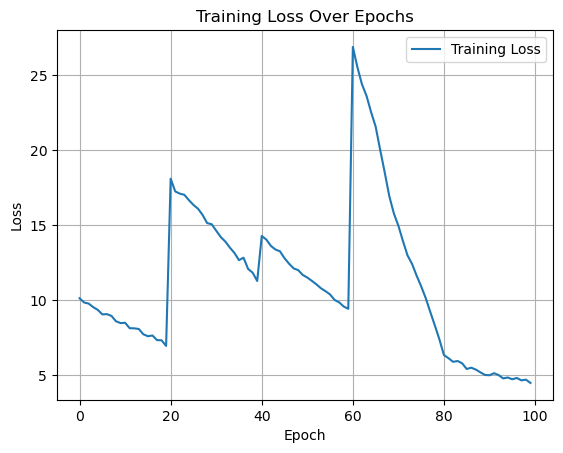

In [37]:
import matplotlib.pyplot as plt

# Plot the loss values
plt.plot(loss_values, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

## Calculated F1 score

In [30]:
from sklearn.metrics import f1_score

true_labels = y_val_tensor.numpy().astype(int)
predicted_labels = 1-(predicted.numpy())
# Calculate F1 score
f1 = f1_score(true_labels, predicted_labels)
print(f'F1 score on test set: {f1:.4f}')



F1 score on test set: 0.3576


In [41]:
test_dataset = pd.read_csv("/Users/danielguarnizo/Desktop/HACK4SDS/Dataset_DAY1/Data/test_set.csv", delimiter=';')
X_test = test_dataset.iloc[:, :].to_numpy()
y_test = test_dataset.iloc[:].to_numpy()

In [45]:
test_dataset.head()

,application_ID,decision_date,company_ID,external_score_ver01,external_score_ver02,late_payment_score,external_score_late_payment_integrated,external_score_moderate,external_score_adverse,external_score_ver03,age,province,juridical_form,industry_sector,gross_margin_ratio,core_income_ratio,cash_asset_ratio,consolidated_liabilities_ratio,tangible_assets_ratio,revenues,cr_available,region,geo_area,last_statement_age,overrun_freq_a_revoca_autoliquidanti,avg_tension_a_revoca_autoliquidanti,std_tension_a_revoca_autoliquidanti,max_tension_a_revoca_autoliquidanti,last_tension_a_revoca_autoliquidanti,avg_rel_used_a_revoca_autoliquidanti,std_rel_used_a_revoca_autoliquidanti,max_rel_used_a_revoca_autoliquidanti,last_rel_used_a_revoca_autoliquidanti,overrun_freq_a_scadenza,avg_rel_used_a_scadenza,std_rel_used_a_scadenza,max_rel_used_a_scadenza,last_rel_used_a_scadenza,avg_count_enti_affidanti,std_count_enti_affidanti,max_count_enti_affidanti,last_count_enti_affidanti,avg_count_numero_prima_info,std_count_numero_prima_info,max_count_numero_prima_info,last_count_numero_prima_info
0,a1Q7R00000ZWFXwUAP,2020-10-12,1321219660,5,1,8.0,5.0,6.0,7.0,D,6,PD,SR,Distribuzione,"0,0698090692124105","-0,0133630289532294","0,0454201362604088","0,39200477326969",1,449,True,Veneto,Nord-est,1,"0,166666666666667","0,554859166666667","0,146890245697462","0,83594","0,60264","0,123576651818857","0,032714976770036","0,186178173719376","0,134218262806236","0,333333333333333","1,27369933184855","0,028642038445761","1,32464142538975","1,32464142538975","1,16666666666667","0,389249472080761",2,2,"1,08333333333333","0,288675134594813",2,1
1,a1Q7R00000ZWJX2UAP,2020-11-12,1420617490,8,1,NaN,NaN,NaN,NaN,F,46,IS,SR,Altri beni di consumo,"0,169093471113199","0,00206611570247934","0,155359917141378","0,54062940347581","0,95959595959596",1402,False,Molise,Sud,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,1,1
2,a1Q7R00000a3E9nUAE,2021-07-05,137667970,8,1,NaN,NaN,NaN,NaN,I,51,CB,SR,Chimica di base e intermedi,"0,0589433072553853","0,0306451612903226","0,0043021855102392","0,640767334690816","0,980113636363636",1254,True,Molise,Sud,2,"0,833333333333333","0,941108491613086","0,0992007690627971","1,0864",1,"0,137654704944179","0,115573259414523","0,267955342902711","0,0119617224880383",0,"0,212708532695375","0,100377623990215","0,33222009569378","0,320196172248804",3,0,3,3,"1,91666666666667","0,288675134594813",2,2
3,a1Q7R00000ZWRR6UAP,2021-01-19,137667970,8,1,NaN,NaN,NaN,NaN,F,51,CB,SR,Chimica di base e intermedi,"0,0589433072553853","0,0306451612903226","0,0043021855102392","0,640767334690816","0,980113636363636",1254,True,Molise,Sud,2,"0,833333333333333","0,878429123495436","0,0566505328975202","0,972473824531666","0,903049655802421","0,252491959064328","0,0249197649236005","0,269318979266348","0,17658293460925",0,"0,14559735513025","0,0113414597444539","0,162240829346092","0,126861244019139",3,0,3,3,"1,91666666666667","0,288675134594813",2,2
4,a1Q7R00000g6DWvUAM,2022-05-09,2412739090,6,1,NaN,NaN,NaN,NaN,F,72,SS,SR,Alimentare,"0,135170603674541","-0,0755467196819085","0,0169851380042463","0,492125984251969","0,769345238095238",1463,True,Sardegna,Isole,2,0,"0,722863999082564","0,0605656113993484","0,816631566033492","0,761046273164548","0,284641717931192","0,0245101240633782","0,315383458646616","0,306924812030075",0,"0,38485640236956","0,0307032798267901","0,478388926862611","0,356901572112098",3,0,3,3,"2,08333333333333","0,288675134594813",3,3


In [44]:
print(X_test.dtype)

object


#### Handle test data

In [43]:
with torch.no_grad():
        
        X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
        outputs = model(X_test)
        predicted = (outputs >= 0.5).float()

TypeError: can't convert np.ndarray of type numpy.object_. The only supported types are: float64, float32, float16, complex64, complex128, int64, int32, int16, int8, uint8, and bool.

## Export The CSV File

In [34]:
predicted_np = predicted.numpy().flatten()
y_test_np = y_val_tensor.numpy().flatten()

# Export the array to a CSV file with column name 'label' and each number on a different row
np.savetxt('output.csv', predicted_labels, fmt='%d', delimiter=',', header='label', comments='')
